In [34]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import datetime as dt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor


In [125]:
archivo=pd.read_excel('bike_train.xlsx',index_col=0)

In [126]:
archivo2=pd.read_excel('bike_test.xlsx',index_col=0)

In [127]:
archivo2.to_csv('bike_test.csv',sep=",",encoding='utf-8')

In [128]:
archivo.to_csv('bike_train.csv',sep=",",encoding='utf-8')

In [129]:
df=pd.read_csv('bike_train.csv')

In [130]:
df2=pd.read_csv('bike_test.csv')

In [131]:
df2

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0       12000  2012-05-20       2   1     5   4        0        0           0   
1       12001  2012-05-20       2   1     5   5        0        0           0   
2       12002  2012-05-20       2   1     5   6        0        0           0   
3       12003  2012-05-20       2   1     5   7        0        0           0   
4       12004  2012-05-20       2   1     5   8        0        0           0   
...       ...         ...     ...  ..   ...  ..      ...      ...         ...   
5375    17375  2012-12-31       1   1    12  19        0        1           1   
5376    17376  2012-12-31       1   1    12  20        0        1           1   
5377    17377  2012-12-31       1   1    12  21        0        1           1   
5378    17378  2012-12-31       1   1    12  22        0        1           1   
5379    17379  2012-12-31       1   1    12  23        0        1           1   

      weathersit  temp   atemp   hum  windspeed  
0              1  0.52  0.5000  0.68     0.0896  
1              1  0.50  0.4848  0.72     0.1045  
2              1  0.50  0.4848  0.63     0.1343  
3              1  0.52  0.5000  0.68     0.1940  
4              1  0.56  0.5303  0.56     0.1642  
...          ...   ...     ...   ...        ...  
5375           2  0.26  0.2576  0.60     0.1642  
5376           2  0.26  0.2576  0.60     0.1642  
5377           1  0.26  0.2576  0.60     0.1642  
5378           1  0.26  0.2727  0.56     0.1343  
5379           1  0.26  0.2727  0.65     0.1343  

[5380 rows x 14 columns]

In [132]:
df

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
0            1  2011-01-01       1   0     1   0        0        6   
1            2  2011-01-01       1   0     1   1        0        6   
2            3  2011-01-01       1   0     1   2        0        6   
3            4  2011-01-01       1   0     1   3        0        6   
4            5  2011-01-01       1   0     1   4        0        6   
...        ...         ...     ...  ..   ...  ..      ...      ...   
11994    11995  2012-05-19       2   1     5  23        0        6   
11995    11996  2012-05-20       2   1     5   0        0        0   
11996    11997  2012-05-20       2   1     5   1        0        0   
11997    11998  2012-05-20       2   1     5   2        0        0   
11998    11999  2012-05-20       2   1     5   3        0        0   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
0               0           1  0.24  0.2879  0.81     0.0000       3   
1               0           1  0.22  0.2727  0.80     0.0000       8   
2               0           1  0.22  0.2727  0.80     0.0000       5   
3               0           1  0.24  0.2879  0.75     0.0000       3   
4               0           1  0.24  0.2879  0.75     0.0000       0   
...           ...         ...   ...     ...   ...        ...     ...   
11994           0           1  0.60  0.6212  0.56     0.1642      71   
11995           0           1  0.58  0.5455  0.53     0.1045      42   
11996           0           1  0.56  0.5303  0.52     0.0000      28   
11997           0           1  0.56  0.5303  0.52     0.0000      36   
11998           0           1  0.54  0.5152  0.56     0.0896      26   

       registered  cnt  
0              13   16  
1              32   40  
2              27   32  
3              10   13  
4               1    1  
...           ...  ...  
11994         168  239  
11995         128  170  
11996         102  130  
11997          62   98  
11998          40   66  

[11999 rows x 17 columns]

In [4]:
df['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [5]:
df.describe()

instant        season            yr          mnth            hr  \
count  11999.000000  11999.000000  11999.000000  11999.000000  11999.000000   
mean    6000.000000      2.210684      0.279523      5.530294     11.556630   
std     3463.957275      1.088798      0.448784      3.433005      6.911891   
min        1.000000      1.000000      0.000000      1.000000      0.000000   
25%     3000.500000      1.000000      0.000000      3.000000      6.000000   
50%     6000.000000      2.000000      0.000000      5.000000     12.000000   
75%     8999.500000      3.000000      1.000000      8.000000     18.000000   
max    11999.000000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  11999.000000  11999.000000  11999.000000  11999.000000  11999.000000   
mean       0.027752      3.009334      0.684057      1.435036      0.465704   
std        0.164269      2.005264      0.464910      0.650894      0.188576   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.320000   
50%        0.000000      3.000000      1.000000      1.000000      0.460000   
75%        0.000000      5.000000      1.000000      2.000000      0.620000   
max        1.000000      6.000000      1.000000      4.000000      0.960000   

              atemp           hum     windspeed        casual    registered  \
count  11999.000000  11999.000000  11999.000000  11999.000000  11999.000000   
mean       0.448888      0.625770      0.196433     30.049837    128.545129   
std        0.169633      0.200637      0.125394     43.596915    124.692750   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.303000      0.470000      0.104500      3.000000     29.000000   
50%        0.454500      0.620000      0.194000     13.000000     98.000000   
75%        0.590900      0.790000      0.283600     39.000000    185.000000   
max        1.000000      1.000000      0.850700    367.000000    770.000000   

                cnt  
count  11999.000000  
mean     158.594966  
std      151.392952  
min        1.000000  
25%       34.000000  
50%      118.000000  
75%      232.000000  
max      957.000000

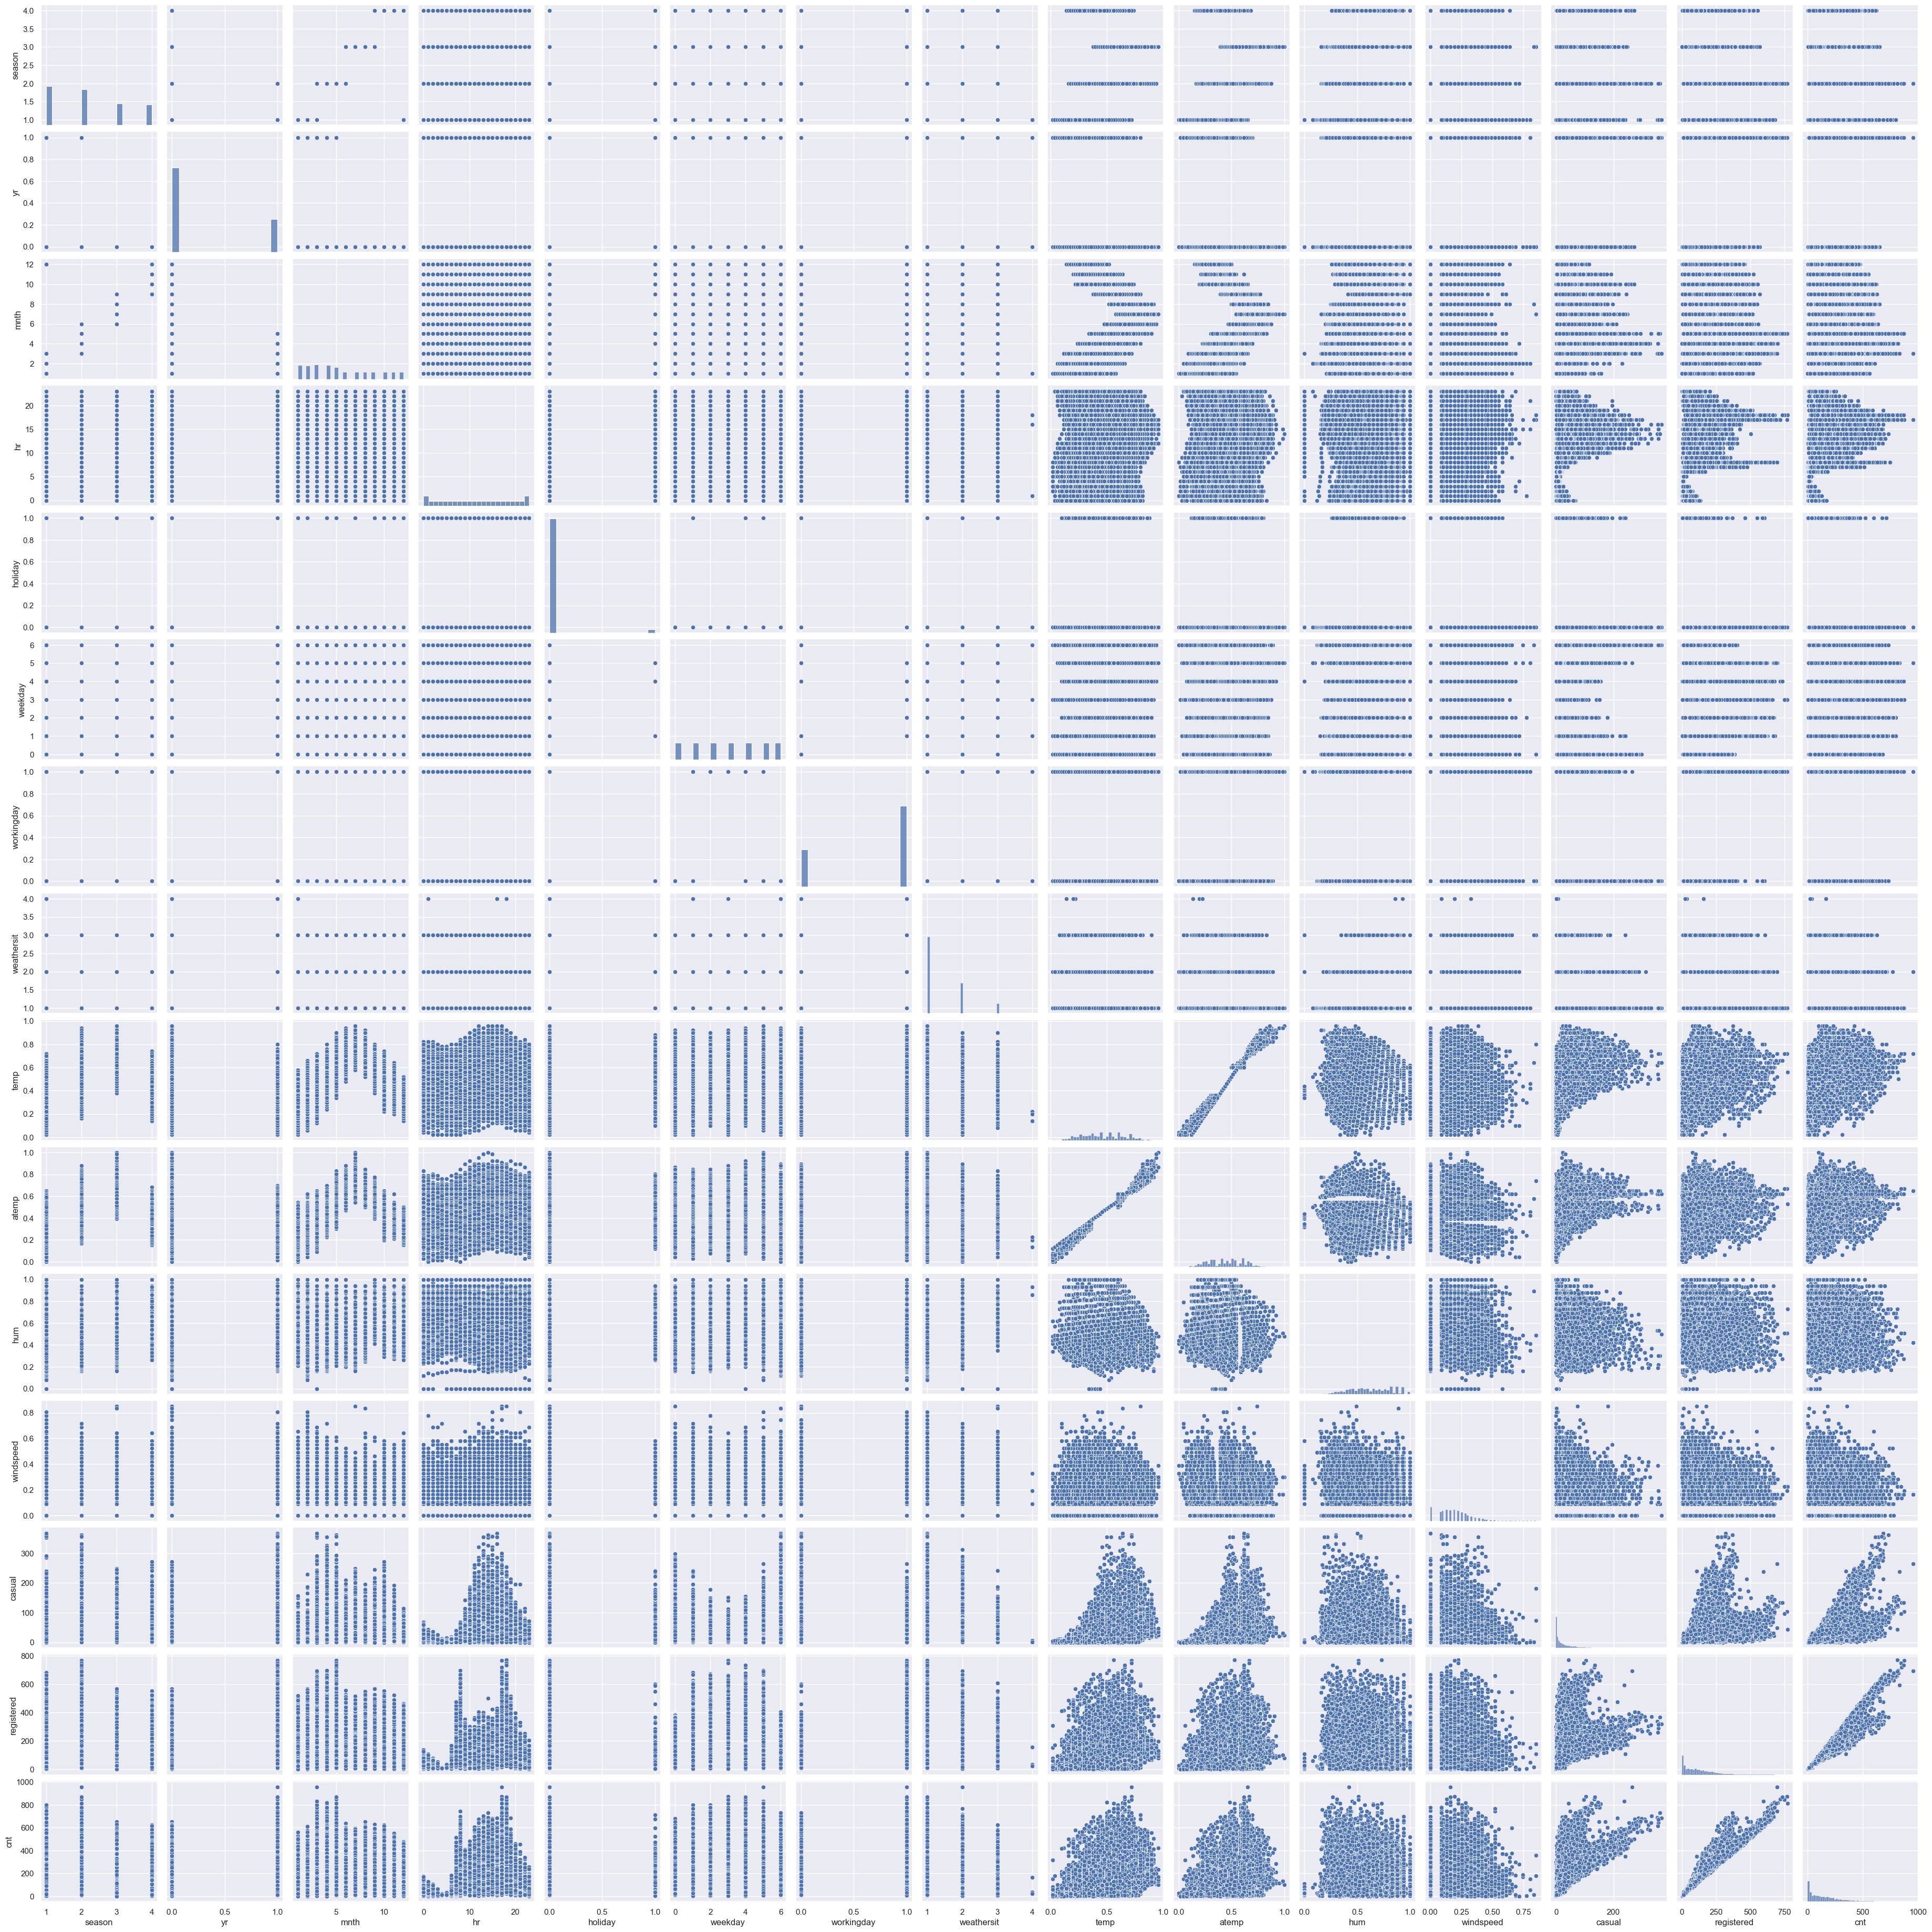

In [16]:
sns.pairplot(df)

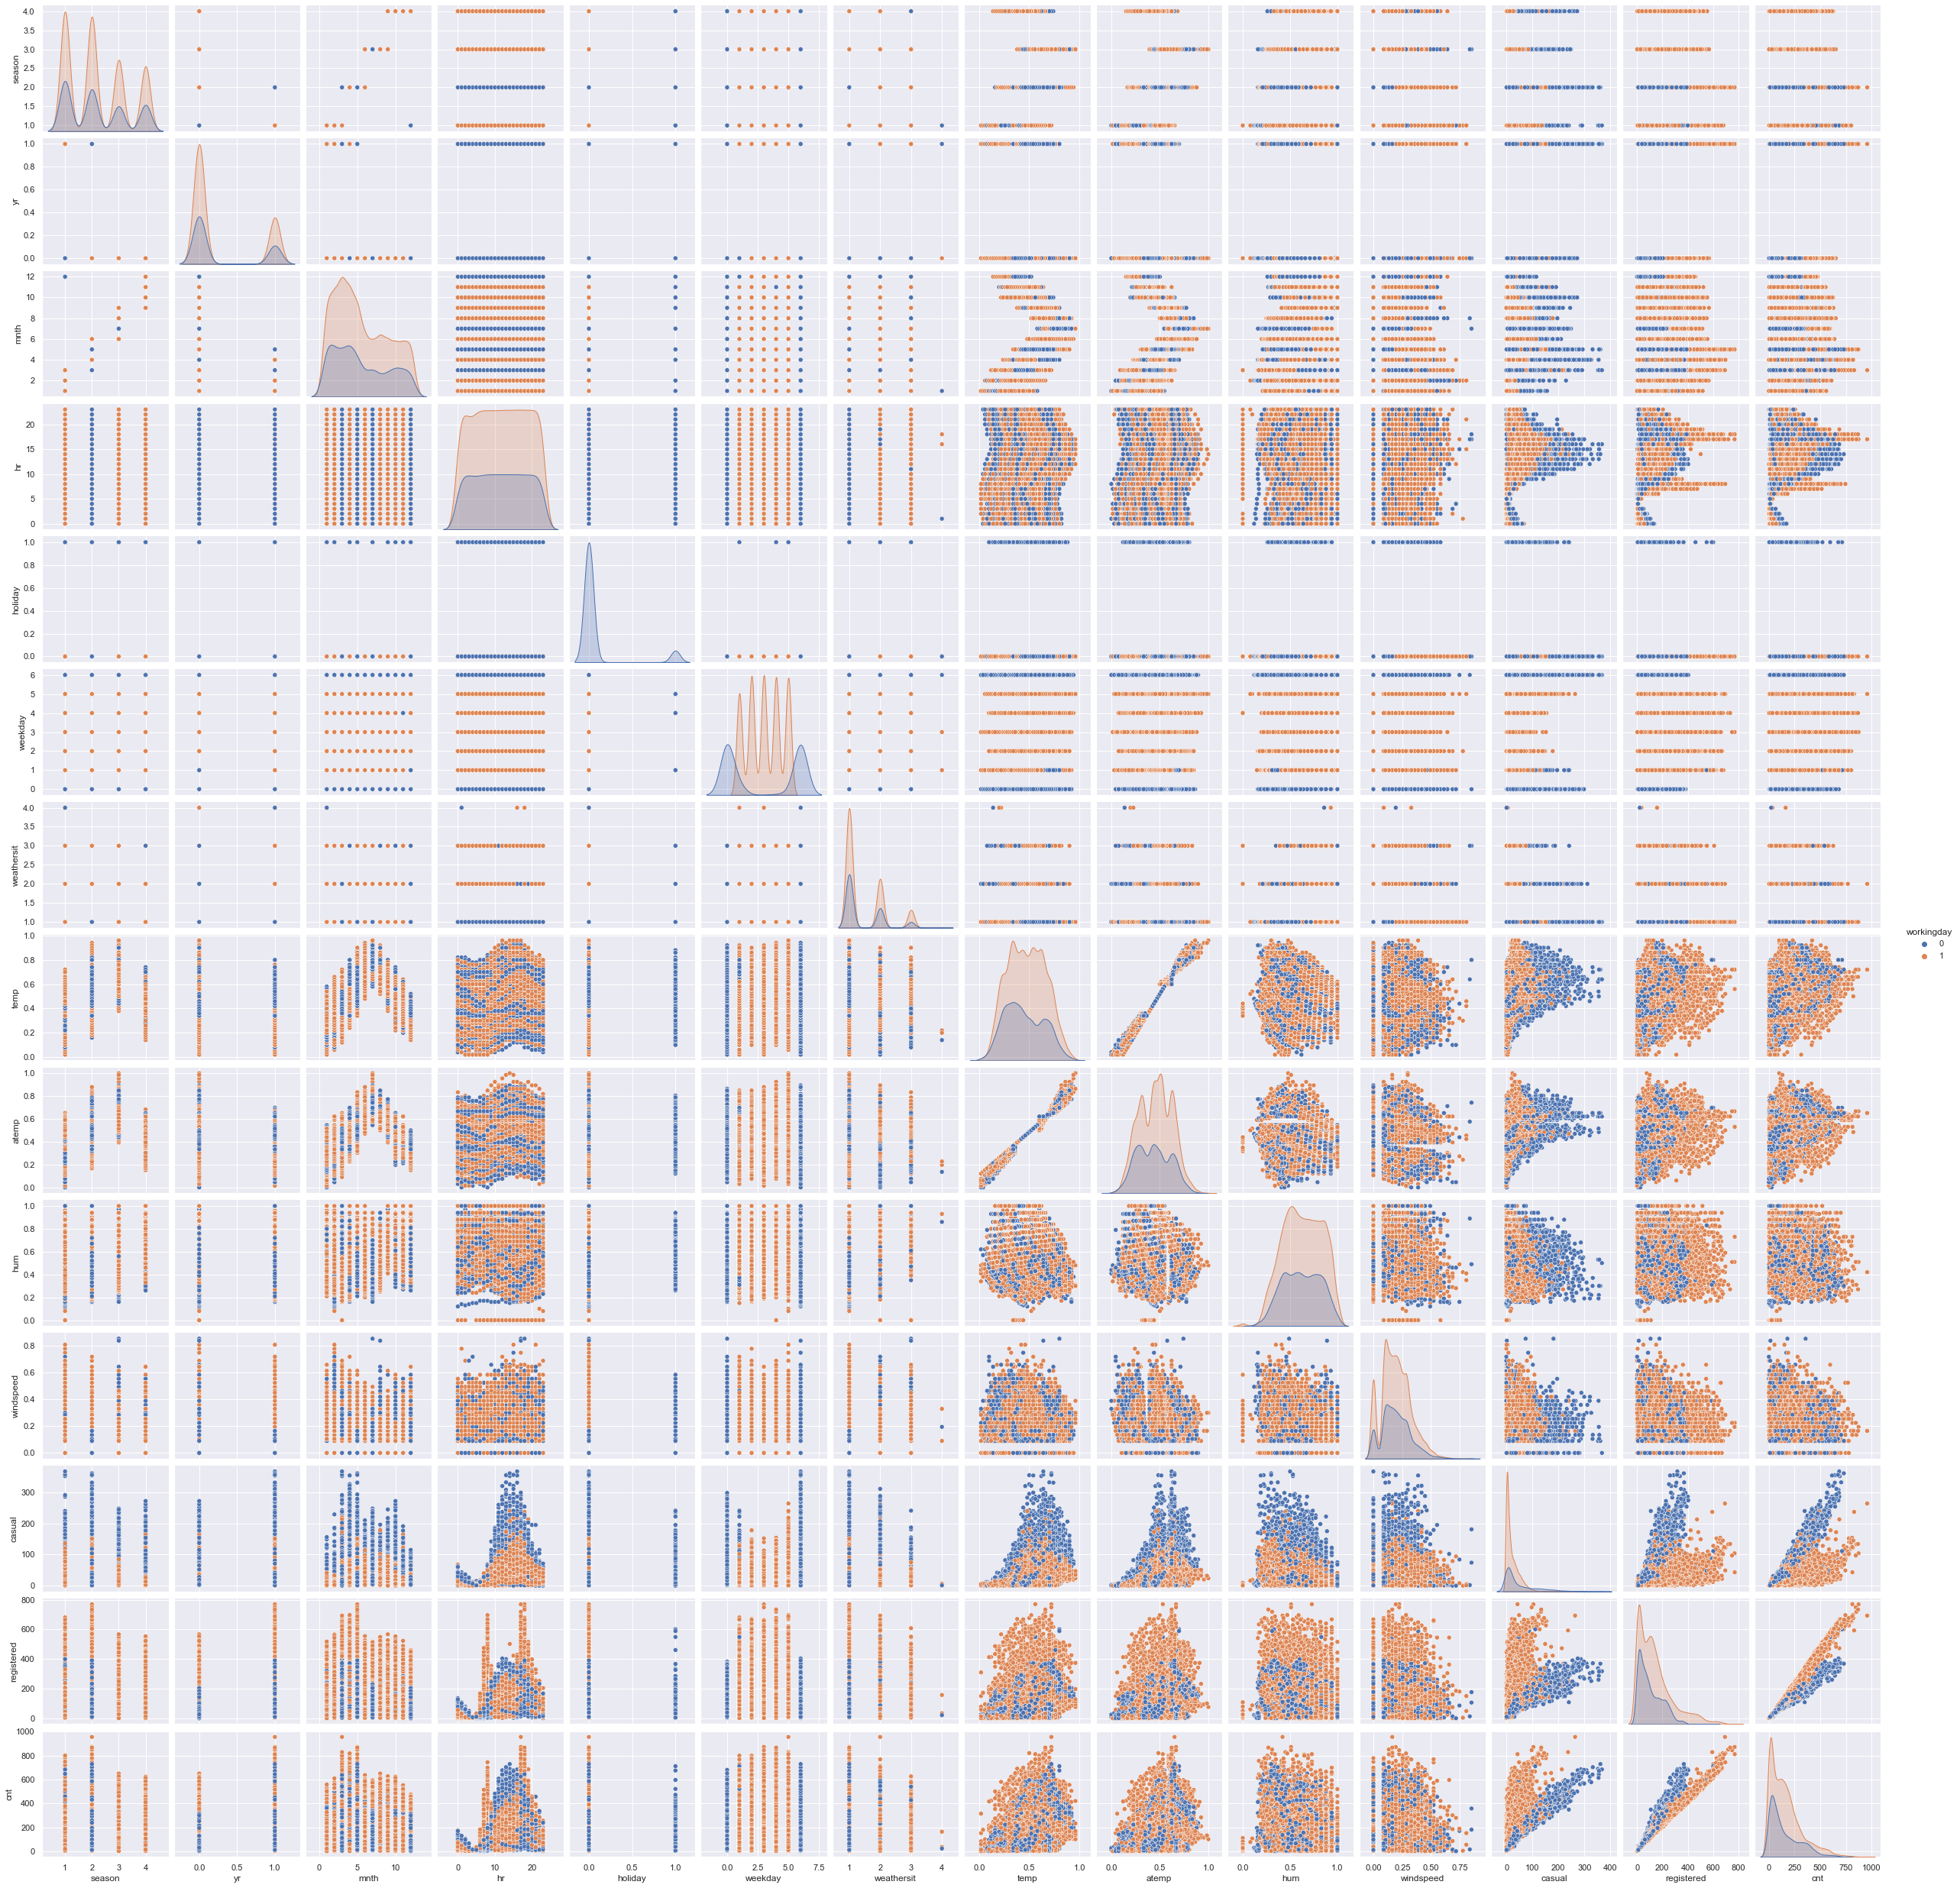

In [8]:
sns.pairplot(df,hue='workingday')

In [6]:
df.drop(columns='instant',inplace=True)

In [7]:
df.nunique()

dteday        506
season          4
yr              2
mnth           12
hr             24
holiday         2
weekday         7
workingday      2
weathersit      4
temp           48
atemp          65
hum            88
windspeed      30
casual        287
registered    623
cnt           713
dtype: int64

In [8]:
df.isna().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      11999 non-null  datetime64[ns]
 1   season      11999 non-null  int64         
 2   yr          11999 non-null  int64         
 3   mnth        11999 non-null  int64         
 4   hr          11999 non-null  int64         
 5   holiday     11999 non-null  int64         
 6   weekday     11999 non-null  int64         
 7   workingday  11999 non-null  int64         
 8   weathersit  11999 non-null  int64         
 9   temp        11999 non-null  float64       
 10  atemp       11999 non-null  float64       
 11  hum         11999 non-null  float64       
 12  windspeed   11999 non-null  float64       
 13  casual      11999 non-null  int64         
 14  registered  11999 non-null  int64         
 15  cnt         11999 non-null  int64         
dtypes: datetime64[ns](1), 

In [71]:
df['dteday']=pd.to_datetime(df['dteday'],format='%Y-%m-%d')

In [73]:
df['dteday']=df['dteday'].map(dt.datetime.toordinal)
df.head()

dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0  734138       1   0     1   0        0        6           0           1   
1  734138       1   0     1   1        0        6           0           1   
2  734138       1   0     1   2        0        6           0           1   
3  734138       1   0     1   3        0        6           0           1   
4  734138       1   0     1   4        0        6           0           1   

   temp   atemp   hum  windspeed  casual  registered  cnt  
0  0.24  0.2879  0.81        0.0       3          13   16  
1  0.22  0.2727  0.80        0.0       8          32   40  
2  0.22  0.2727  0.80        0.0       5          27   32  
3  0.24  0.2879  0.75        0.0       3          10   13  
4  0.24  0.2879  0.75        0.0       0           1    1

In [ ]:
sns.pairplot(df,hue='holiday')

In [ ]:
sns.countplot(x='workingday',hue='cnt',data=df)
plt.title('prue')
plt.show()

In [ ]:
sns.countplot(x='workingday',hue='casual',data=df)

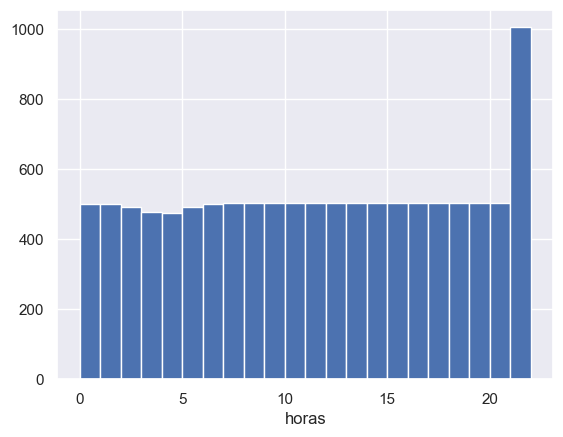

In [94]:

df.hr.hist(bins = np.arange(0,23,1))
plt.xlabel('horas')
plt.show()

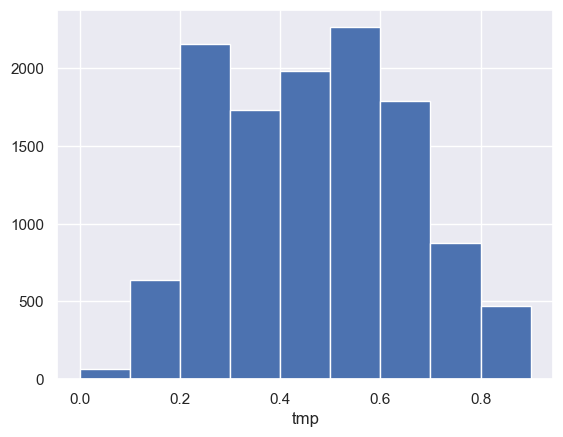

In [78]:

df.temp.hist(bins = np.arange(0,1,0.1))
plt.xlabel('tmp')
plt.show()

In [98]:
df.hum.unique()

array([0.81, 0.8 , 0.75, 0.86, 0.76, 0.77, 0.72, 0.82, 0.88, 0.87, 0.94,
       1.  , 0.71, 0.66, 0.57, 0.46, 0.42, 0.39, 0.44, 0.47, 0.5 , 0.43,
       0.4 , 0.35, 0.3 , 0.32, 0.64, 0.69, 0.55, 0.59, 0.63, 0.68, 0.74,
       0.51, 0.56, 0.52, 0.49, 0.48, 0.37, 0.33, 0.28, 0.38, 0.36, 0.93,
       0.29, 0.53, 0.34, 0.54, 0.41, 0.45, 0.92, 0.62, 0.58, 0.61, 0.6 ,
       0.65, 0.7 , 0.27, 0.21, 0.25, 0.26, 0.31, 0.73, 0.24, 0.23, 0.22,
       0.19, 0.15, 0.67, 0.1 , 0.08, 0.12, 0.14, 0.13, 0.17, 0.16, 0.18,
       0.96, 0.2 , 0.85, 0.  , 0.9 , 0.83, 0.78, 0.84, 0.89, 0.79, 0.97])

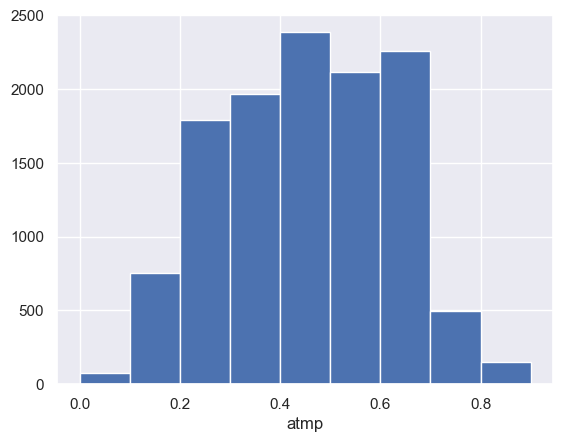

In [83]:

df.atemp.hist(bins = np.arange(0,1,0.1))
plt.xlabel('atmp')
plt.show()

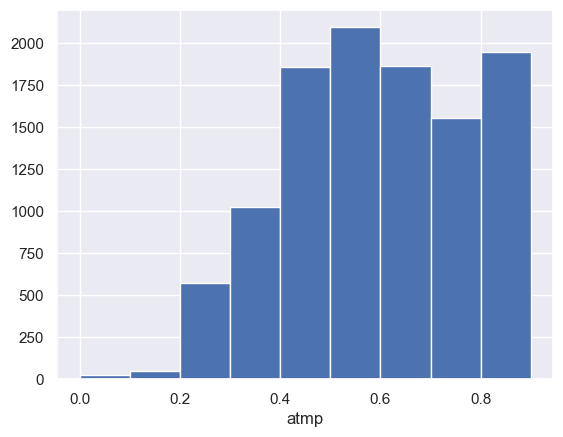

In [99]:
df.hum.hist(bins = np.arange(0,1,0.1))
plt.xlabel('atmp')
plt.show()

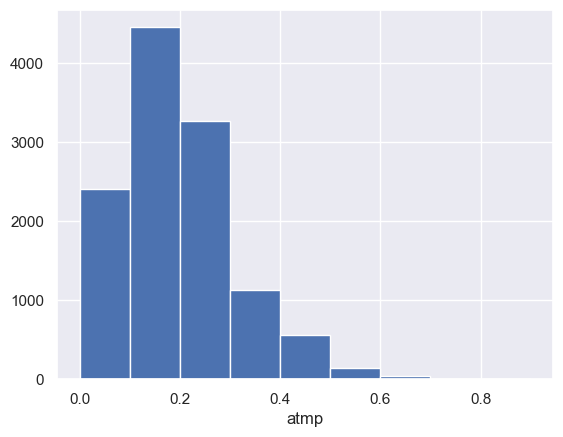

In [100]:
df.windspeed.hist(bins = np.arange(0,1,0.1))
plt.xlabel('atmp')
plt.show()

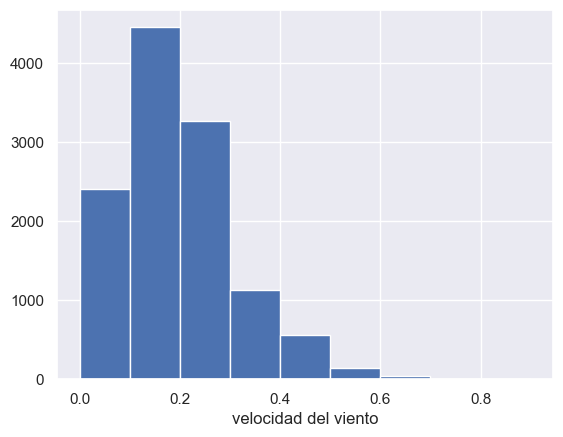

In [13]:
df.windspeed.hist(bins = np.arange(0,1,0.1))
plt.xlabel('velocidad del viento')
plt.show()

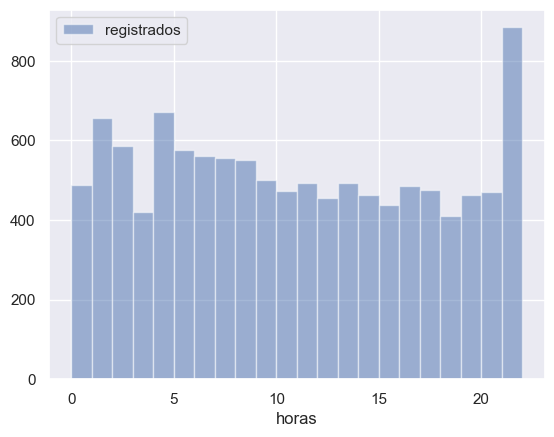

In [88]:
pr1 = df.hr[df.registered]
pr1.hist(bins = np.arange(0,23,1),label = 'registrados', alpha = 0.5)
plt.xlabel('horas')
plt.legend()
plt.show()

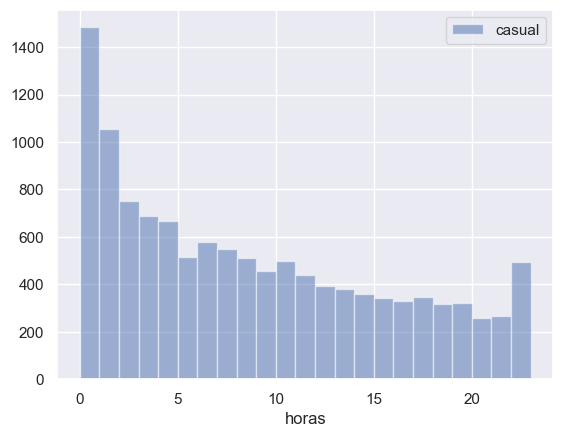

In [87]:
pr1 = df.hr[df.casual]
pr1.hist(bins = np.arange(0,24,1),label = 'casual', alpha = 0.5)
plt.xlabel('horas')
plt.legend()
plt.show()

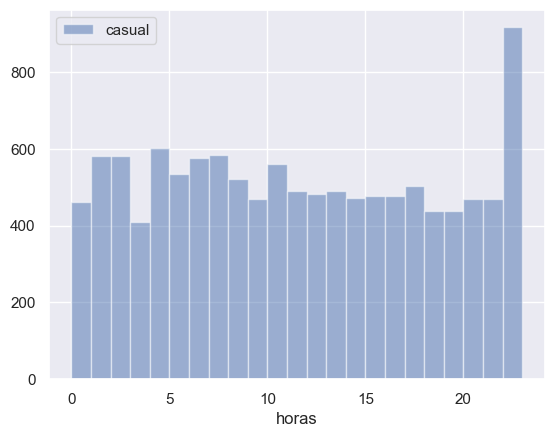

In [95]:
pr1 = df.hr[df.cnt]
pr1.hist(bins = np.arange(0,24,1),label = 'casual', alpha = 0.5)
plt.xlabel('horas')
plt.legend()
plt.show()

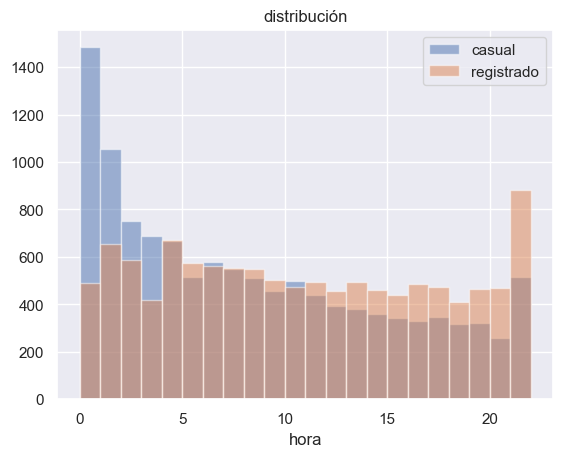

In [104]:
prA = df.hr[df.casual]
prB = df.hr[df.registered]

prA.hist(bins = np.arange(0,23,1),label = 'casual', alpha = 0.5)
prB.hist(bins = np.arange(0,23,1),label = 'registrado', alpha = 0.5)

plt.title('distribución')
plt.xlabel('hora')
plt.legend()
plt.show()

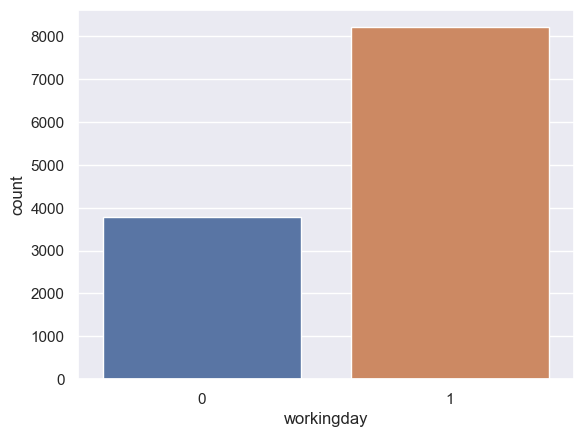

In [90]:
sns.countplot(x='workingday',data=df)
plt.show()

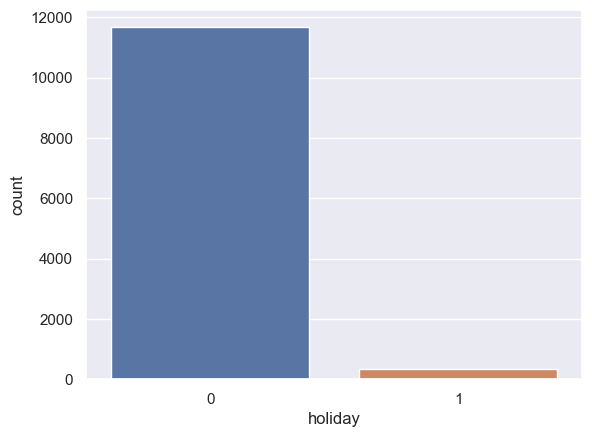

In [91]:
sns.countplot(x='holiday',data=df)
plt.show()

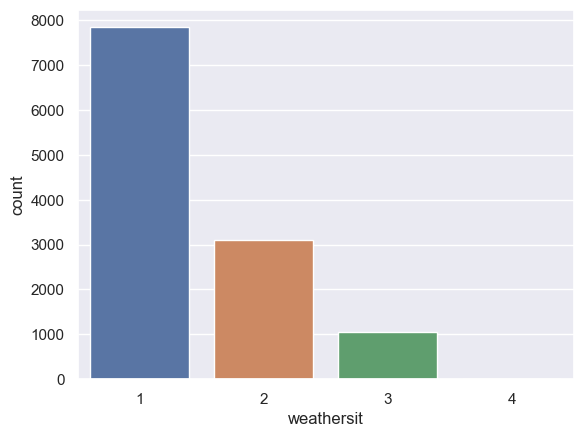

In [96]:
sns.countplot(x='weathersit',data=df)
plt.show()

1=despejado
2=Neblina
3=Nieve ligera
4=lluvia fuerte con granizo

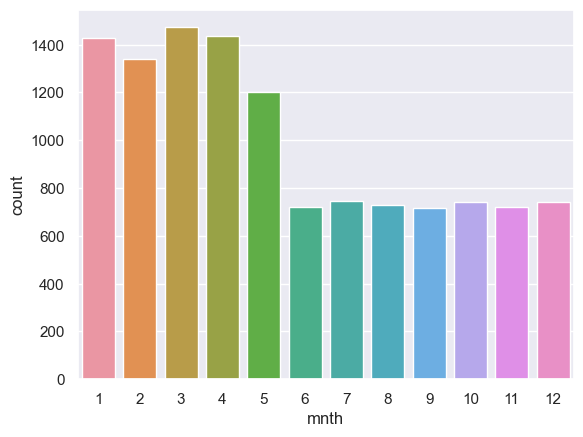

In [101]:
sns.countplot(x='mnth',data=df)
plt.show()

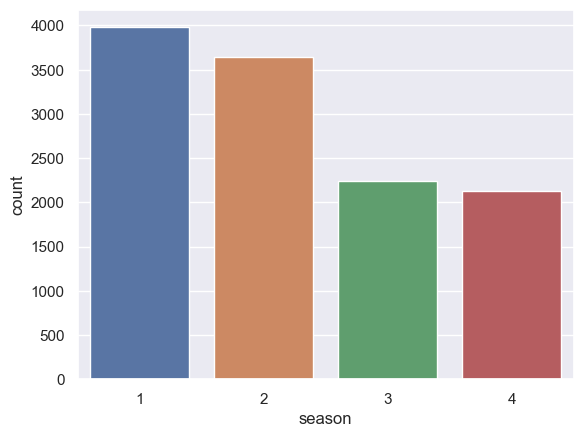

In [103]:
sns.countplot(x='season',data=df)
plt.show()

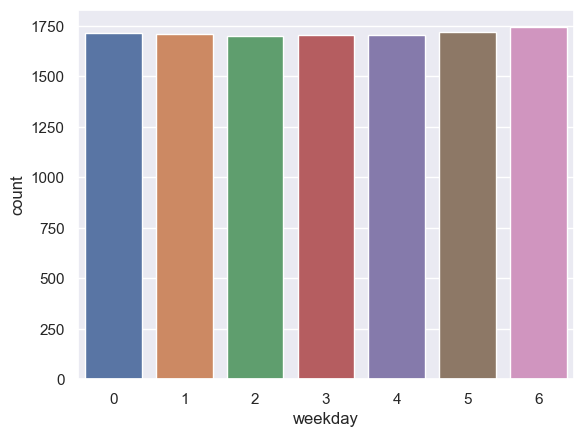

In [99]:
sns.countplot(x='weekday',data=df)
plt.show()

temporadas del del año 1 primavera 2 verano 3 otoño 4 invierno

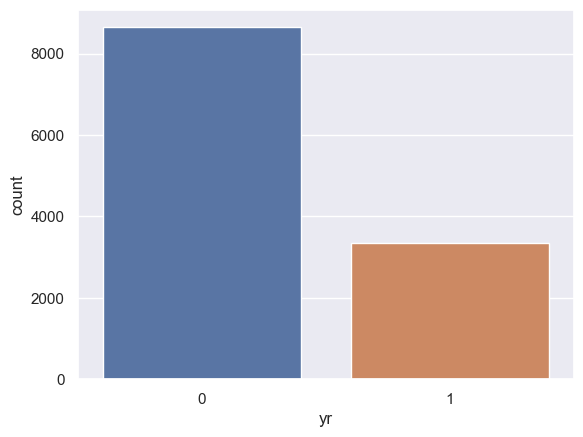

In [105]:
sns.countplot(x='yr',data=df)
plt.show()

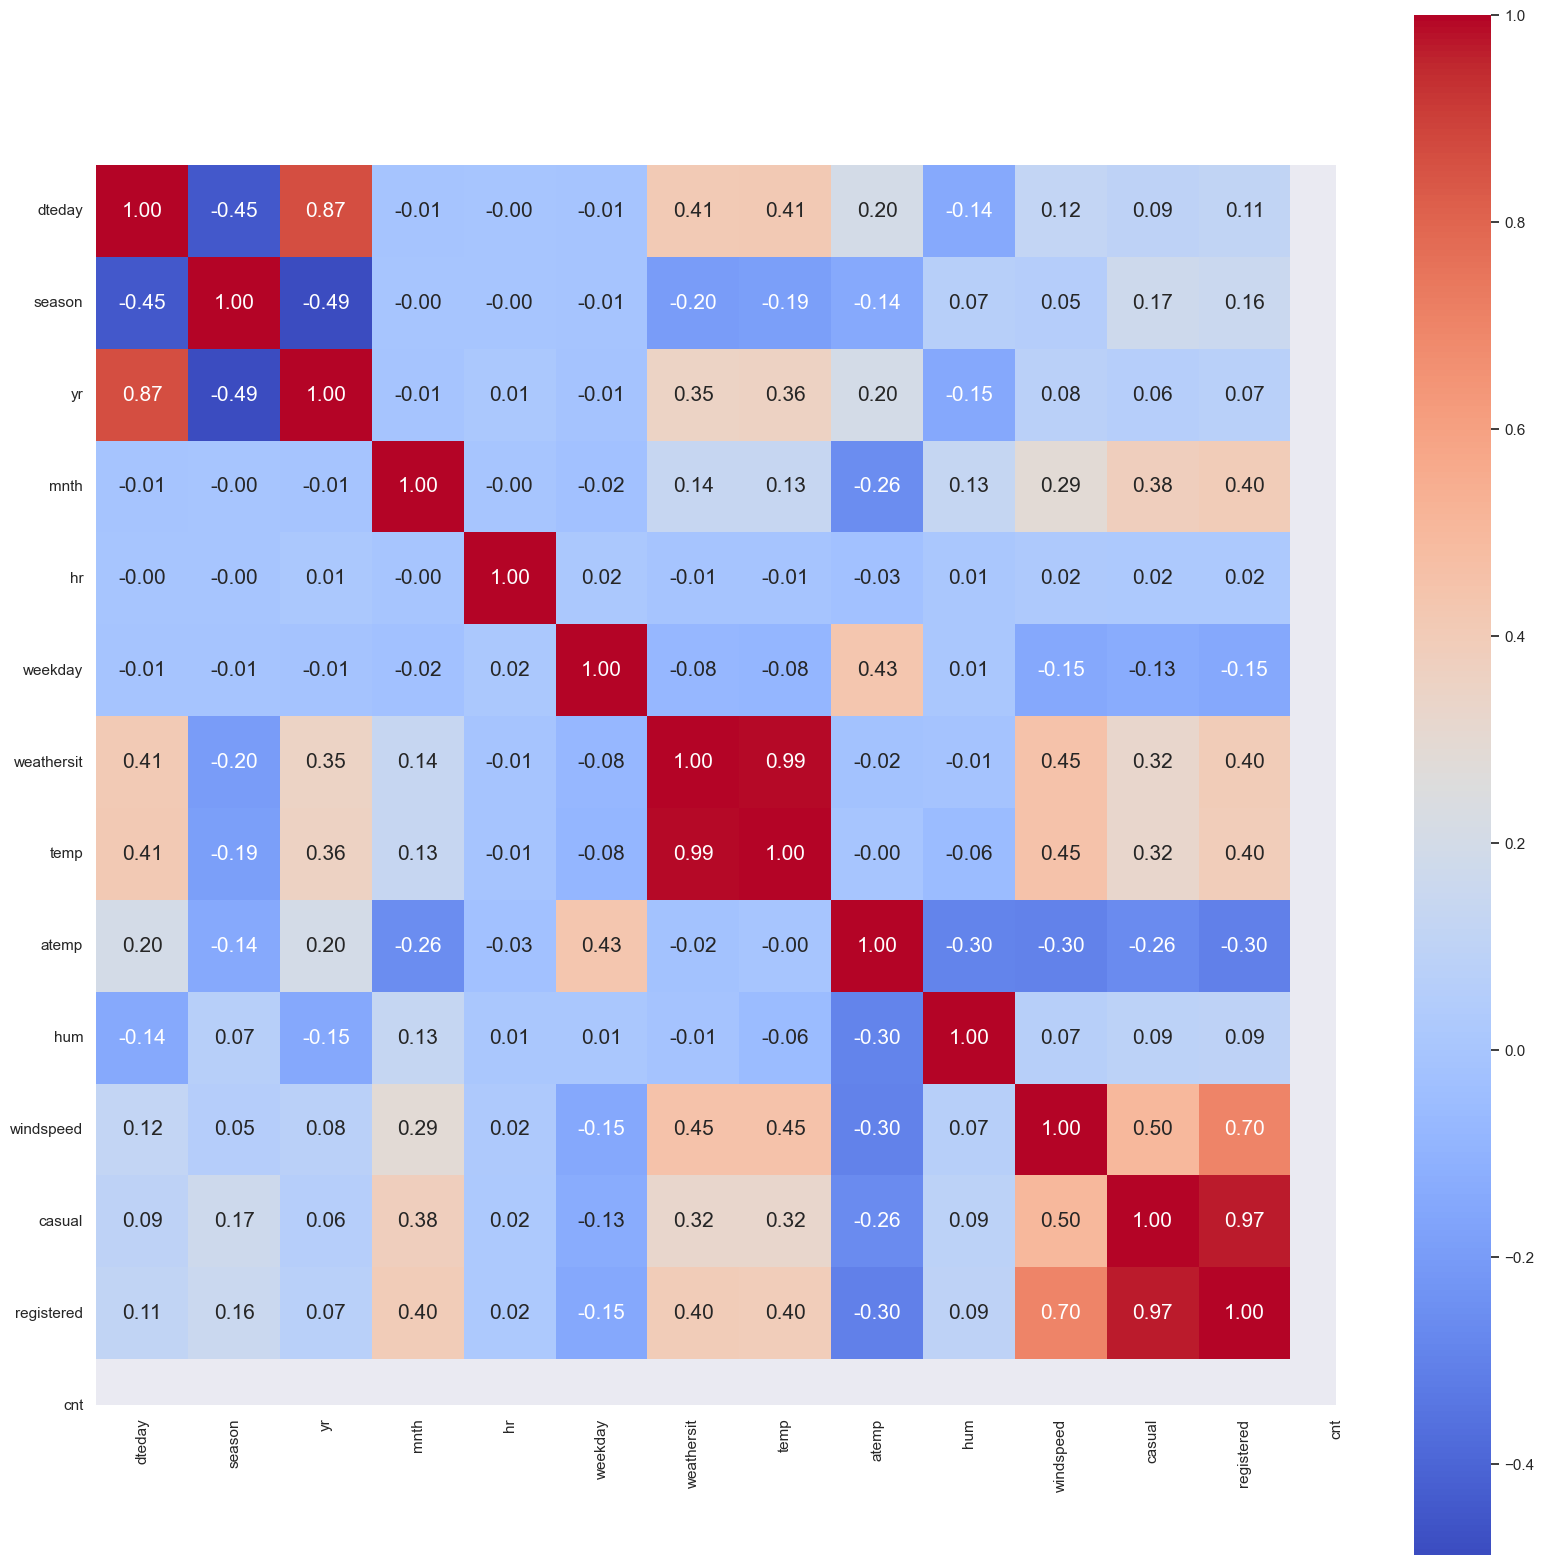

In [115]:
corr = df.drop(columns = ['holiday','workingday']).corr()  #is used for find corelation
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= df.drop(columns = ['holiday','workingday']).columns, 
           yticklabels= df.drop(columns = ['holiday','workingday']).columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

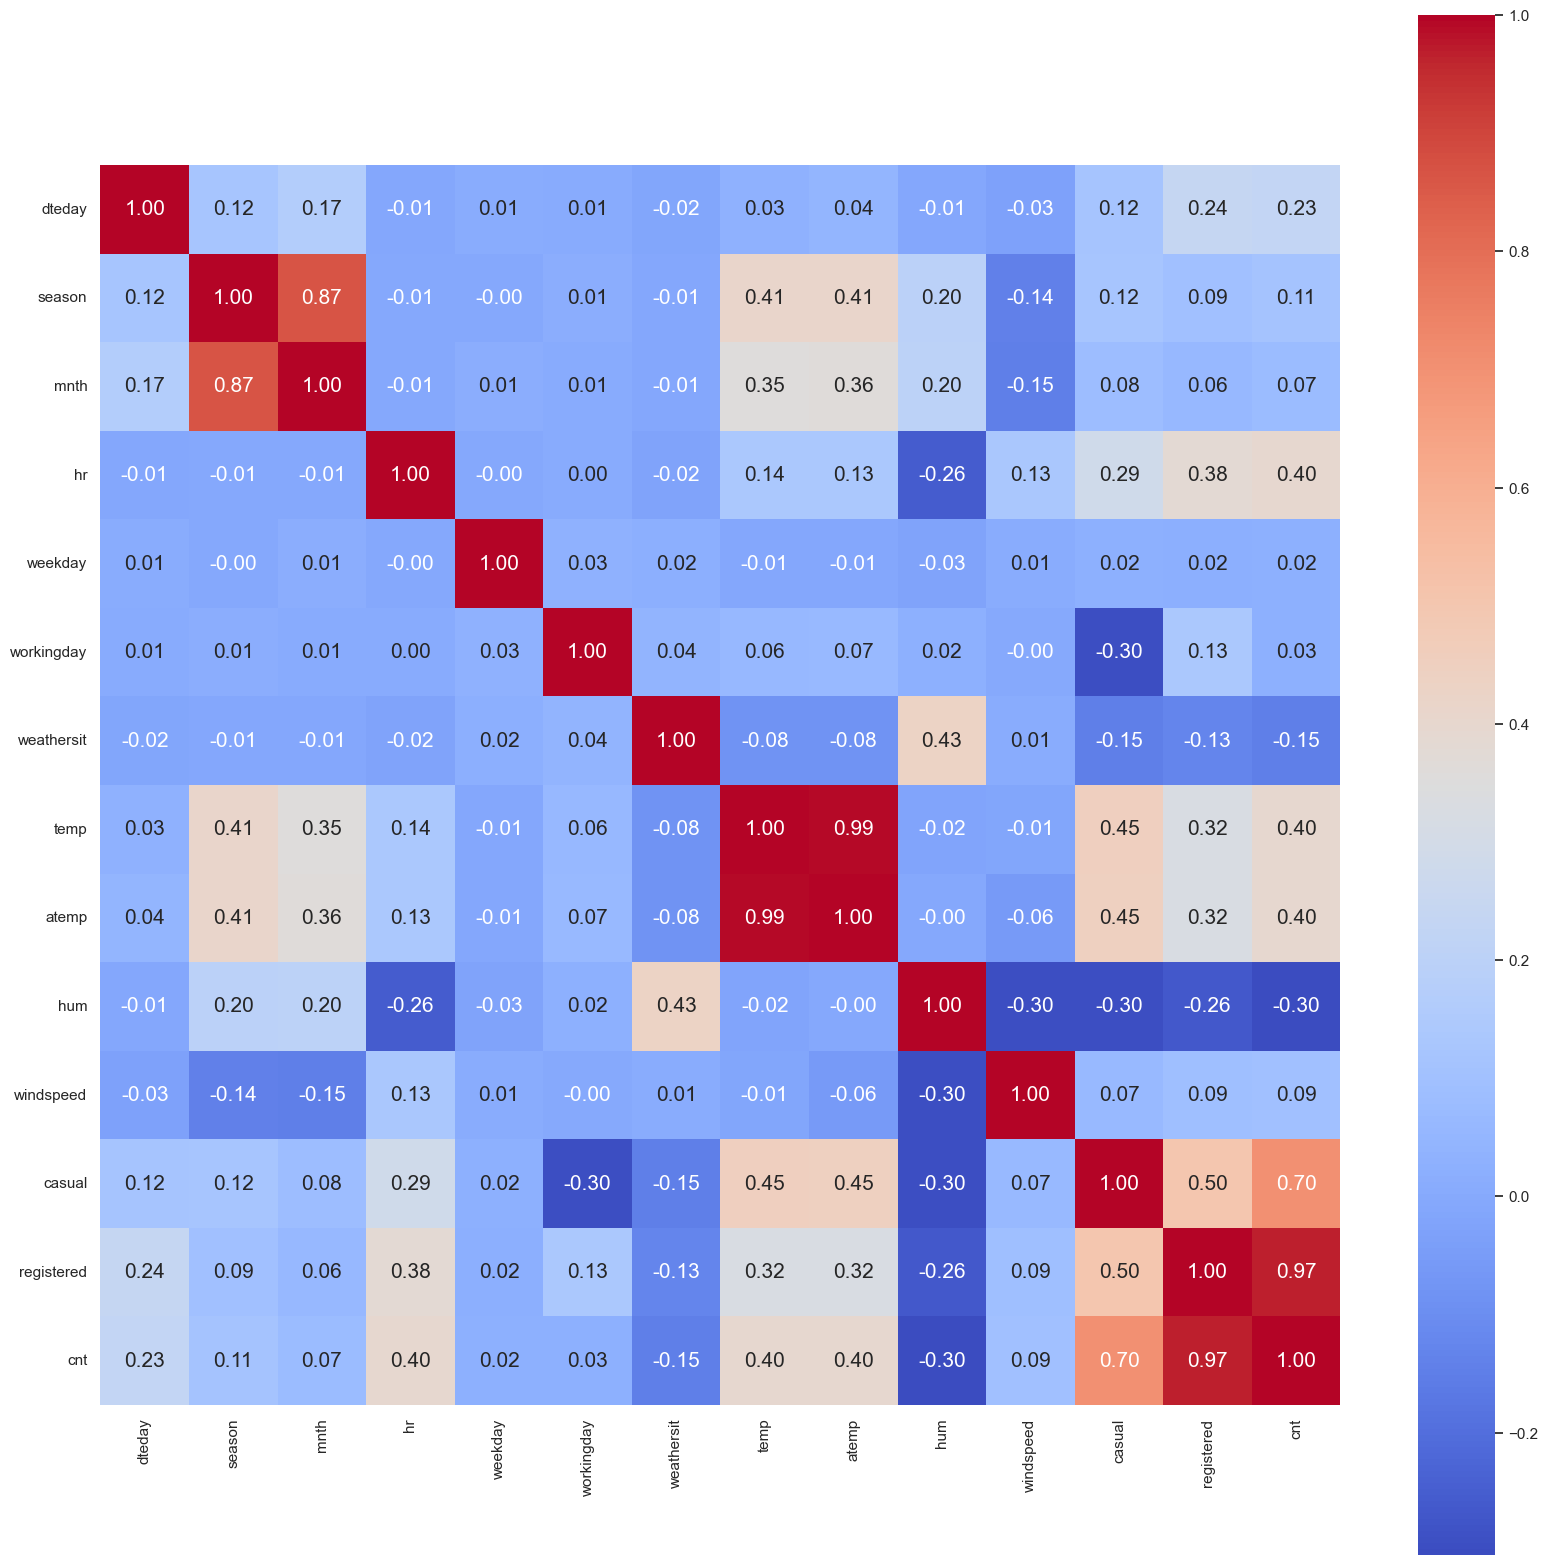

In [74]:
corr = df.drop(columns = ['yr','holiday']).corr()  #is used for find corelation
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= df.drop(columns = ['yr','holiday']).columns, 
           yticklabels= df.drop(columns = ['yr','holiday']).columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

In [66]:
cov=np.sum((df.windspeed-df.windspeed.mean())*(df.atemp-df.atemp.mean()))/df.windspeed.size
print(cov)

-0.0012255074361397214


In [68]:
corr = cov/(df.windspeed.std()*df.atemp.std())
print(corr)

-0.057614285477458456


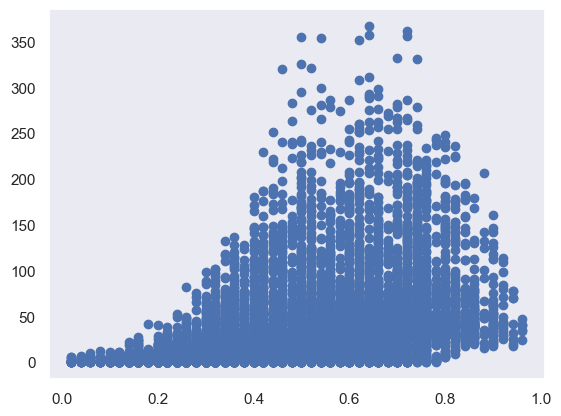

In [78]:
plt.scatter(df.temp,df.casual)
plt.grid()
plt.show()

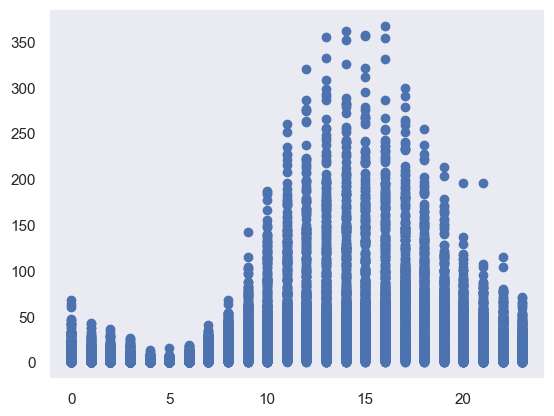

In [9]:
plt.scatter(df.hr,df.casual)
plt.grid()
plt.show()

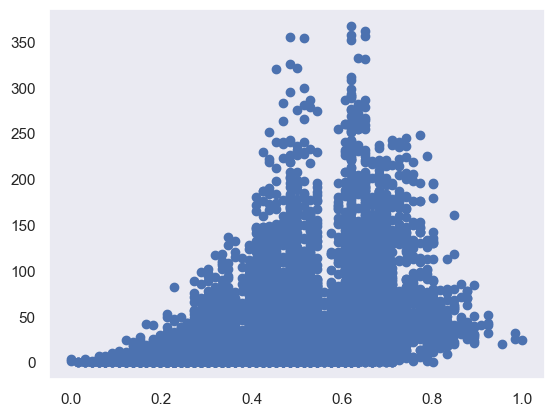

In [81]:
plt.scatter(df.atemp,df.casual)
plt.grid()
plt.show()

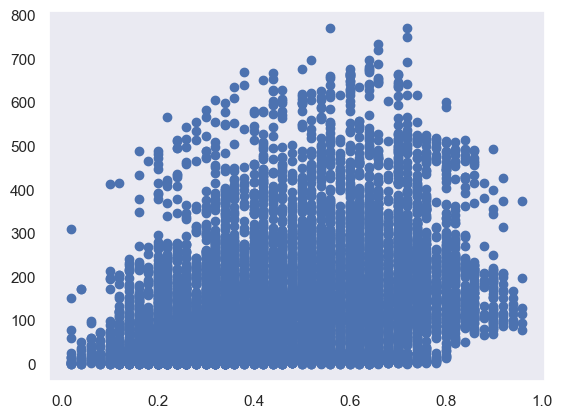

In [82]:
plt.scatter(df.temp,df.registered)
plt.grid()
plt.show()

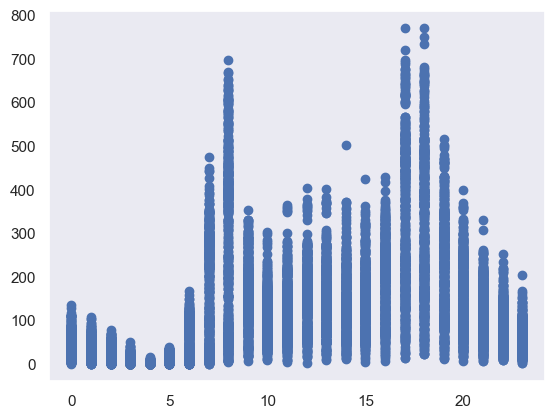

In [10]:
plt.scatter(df.hr,df.registered)
plt.grid()
plt.show()

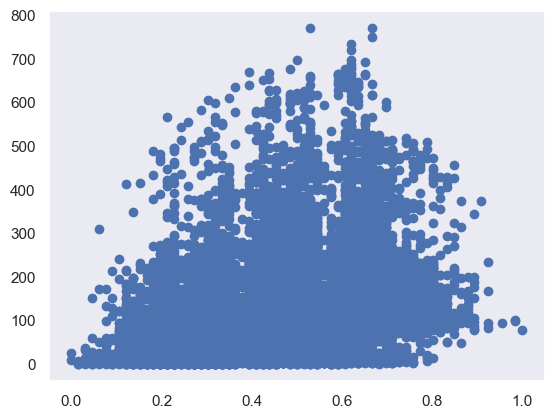

In [80]:
plt.scatter(df.atemp,df.registered)
plt.grid()
plt.show()

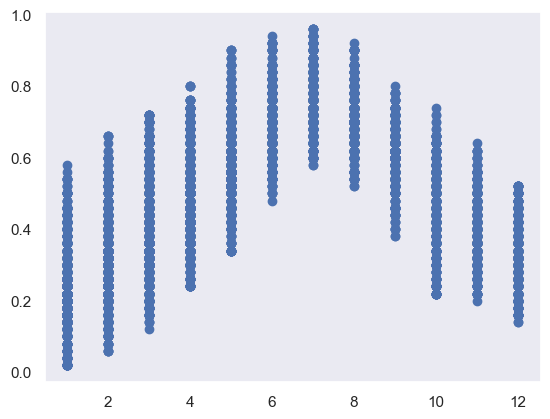

In [100]:
plt.scatter(df.mnth,df.temp)
plt.grid()
plt.show()

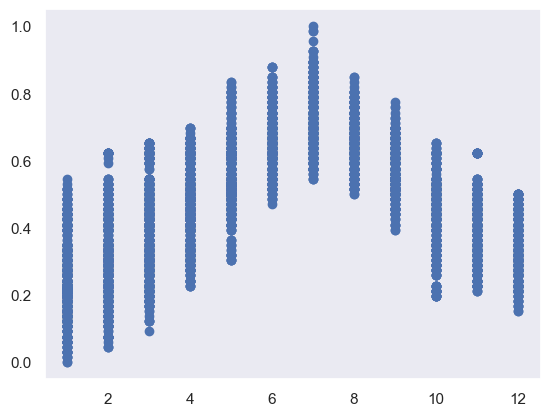

In [101]:
plt.scatter(df.mnth,df.atemp)
plt.grid()
plt.show()

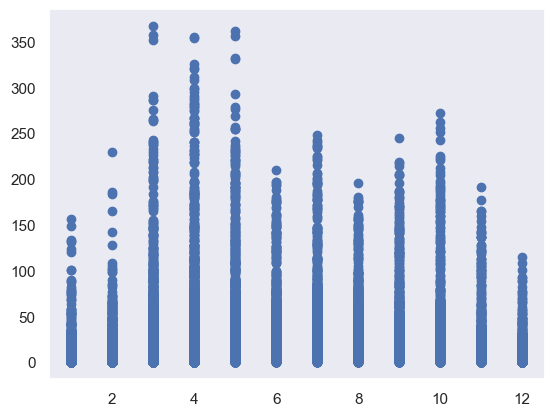

In [102]:
plt.scatter(df.mnth,df.casual)
plt.grid()
plt.show()

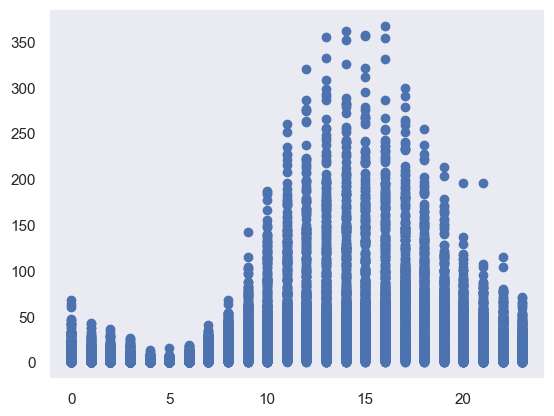

In [104]:
plt.scatter(df.hr,df.casual)
plt.grid()
plt.show()

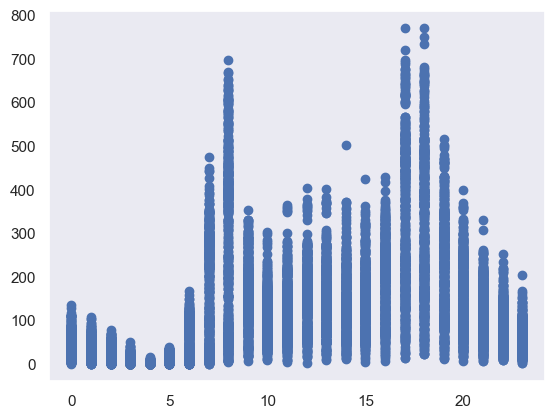

In [105]:
plt.scatter(df.hr,df.registered)
plt.grid()
plt.show()

In [ ]:
plt.scatter(df.hr,df.cnt)
plt.grid()
plt.show()

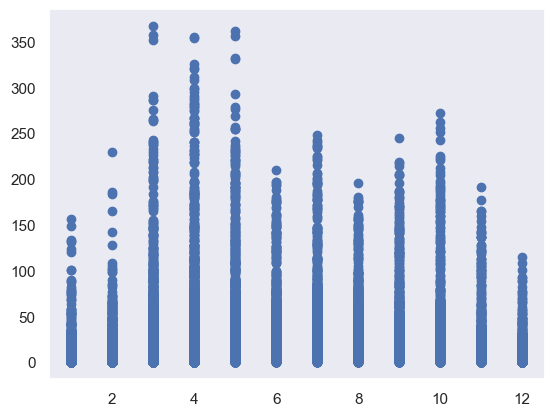

In [110]:
plt.scatter(df.mnth,df.casual)
plt.grid()
plt.show()

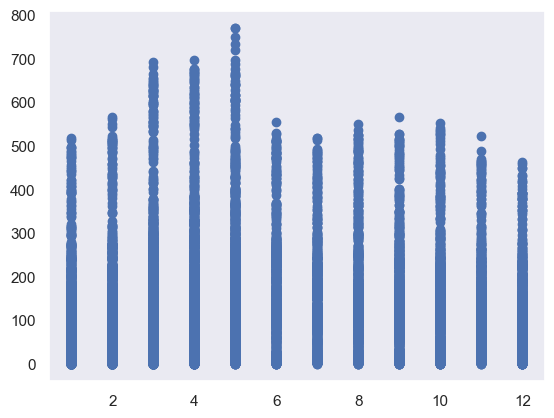

In [114]:
plt.scatter(df.mnth,df.registered)
plt.grid()
plt.show()

In [17]:
x= df.windspeed
y= df.cnt   

In [18]:
np.cov([x,y])

array([[1.57236263e-02, 1.79949220e+00],
       [1.79949220e+00, 2.29198258e+04]])

In [19]:
np.corrcoef([x,y])

array([[1.        , 0.09479119],
       [0.09479119, 1.        ]])

registered y casual con hr =  0.38 y 0.28 respectivamente 

registered 
temp

array([[1.55482818e+04, 7.59212797e+00],<br>
       [7.59212797e+00, 3.55610628e-02]])


array([[1.       , 0.3228754], <br>
       [0.3228754, 1.       ]])

registered
atemp

array([[1.55482818e+04, 6.83766467e+00], <br>
       [6.83766467e+00, 2.87752315e-02]])

array([[1.        , 0.32326388],   <br>
       [0.32326388, 1.        ]])

casual
temp

array([[1.90069096e+03, 3.70599509e+00], <br>
       [3.70599509e+00, 3.55610628e-02]]) 

array([[1.        , 0.45077697],   <br>
       [0.45077697, 1.        ]])

casual atemp

array([[1.90069096e+03, 3.31241956e+00],  <br>
       [3.31241956e+00, 2.87752315e-02]])

array([[1.        , 0.44789908],      <br>
       [0.44789908, 1.        ]])

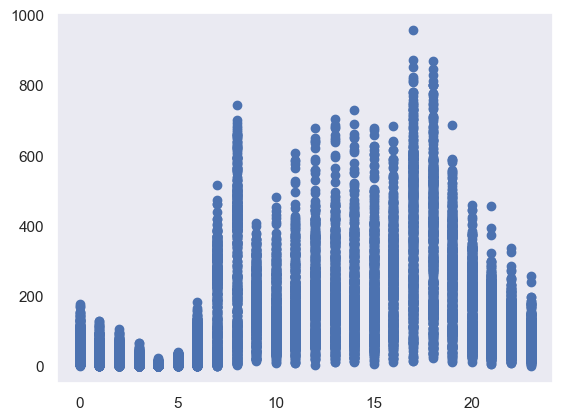

In [12]:
plt.scatter(df.hr,df.cnt)
plt.grid()
plt.show()

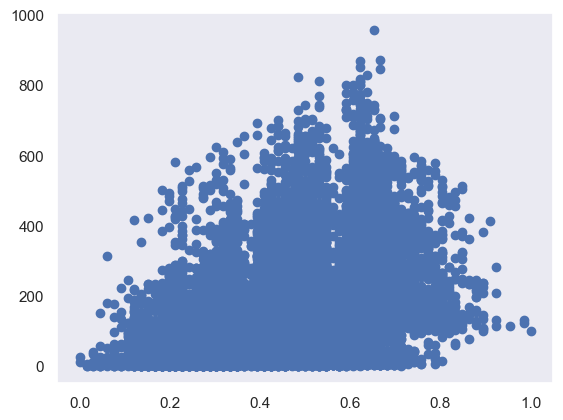

In [14]:
plt.scatter(df.atemp,df.cnt)
plt.grid()
plt.show()

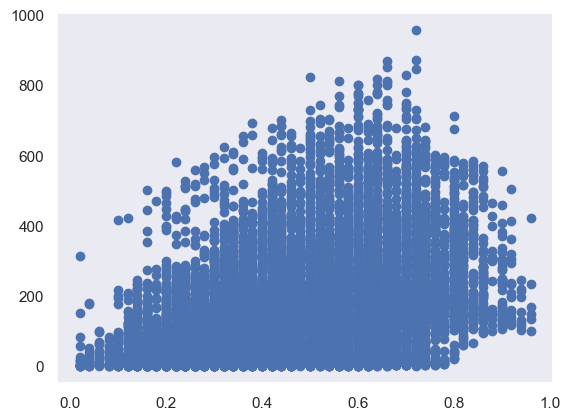

In [13]:
plt.scatter(df.temp,df.cnt)
plt.grid()
plt.show()

reescalado de los datos de la columna cnt

In [41]:
pru3=preprocessing.MinMaxScaler()
cnt=pru3.fit_transform(df['cnt'].values.reshape(-1,1))
cnt

array([[0.01569038],
       [0.04079498],
       [0.03242678],
       ...,
       [0.13493724],
       [0.10146444],
       [0.06799163]])

In [46]:
pru4=preprocessing.MinMaxScaler()
hr=pru4.fit_transform(df['hr'].values.reshape(-1,1))
hr

array([[0.        ],
       [0.04347826],
       [0.08695652],
       ...,
       [0.04347826],
       [0.08695652],
       [0.13043478]])

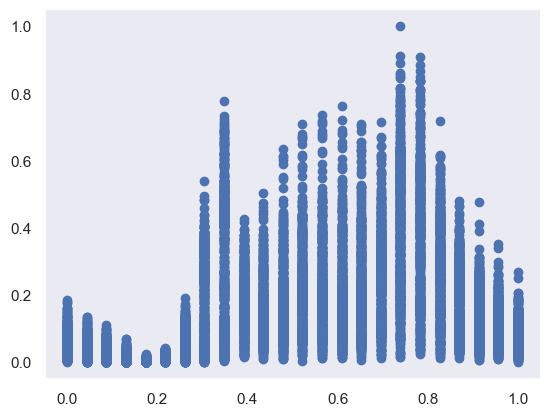

In [47]:
plt.scatter(hr,cnt)
plt.grid()
plt.show()

Creación de Modelo KNN (Regresión)

In [39]:
cnt

array([[0.01569038],
       [0.04079498],
       [0.03242678],
       ...,
       [0.13493724],
       [0.10146444],
       [0.06799163]])

In [43]:
df['hr']

0         0
1         1
2         2
3         3
4         4
         ..
11994    23
11995     0
11996     1
11997     2
11998     3
Name: hr, Length: 11999, dtype: int64

In [65]:
num=3000
knn = KNeighborsRegressor(n_neighbors=num)
knn.fit(hr,cnt)

hr_instancia = pru4.transform([[1]])
cnt_intancia = knn.predict(hr_instancia)

pru3.inverse_transform(cnt_intancia)

array([[20.85233333]])

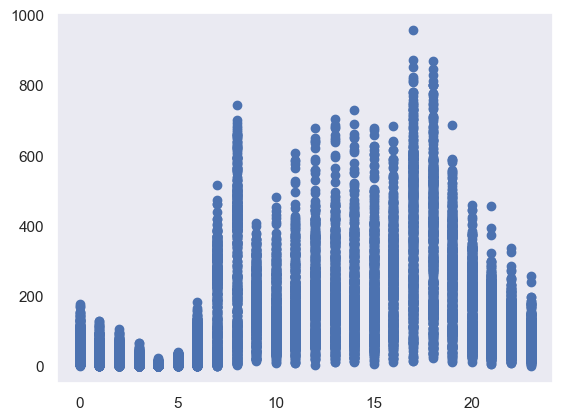

In [63]:
plt.scatter(df['hr'],df['cnt'])
plt.grid()
plt.show()

In [113]:
#num=500 
num=500
knn = KNeighborsRegressor(n_neighbors=num)
knn.fit(hr,cnt)

###################################################

hr_instancias = pru4.transform(np.arange(24).reshape(-1,1))
cnt_intancias = knn.predict(hr_instancias)

todas = pru3.inverse_transform(cnt_intancias)
#todas = todas.reshape(1,-1)

In [ ]:
todas

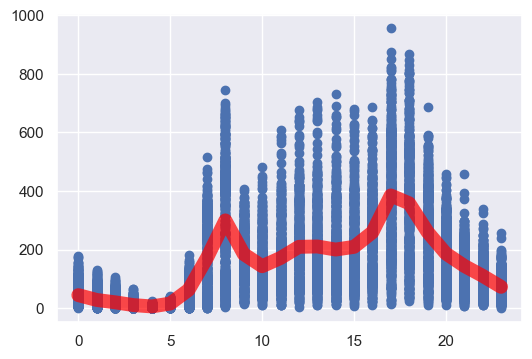

In [115]:
#grafico
fig = plt.figure(figsize=(6, 4))

plt.plot(np.arange(24), todas.reshape(1,-1)[0],linewidth=10, color="red", alpha=0.7)

plt.scatter(df.hr,df.cnt)

plt.show()

In [112]:

mse = (np.square(todas - todas)).mean()
mse


0.0

prueba con los datos 

In [120]:
num=500
knn = KNeighborsRegressor(n_neighbors=num)
knn.fit(hr,cnt)

hr_instancia = pru4.transform([[15]])
cnt_intancia = knn.predict(hr_instancia)

pru3.inverse_transform(cnt_intancia)

array([[209.094]])

In [158]:
df2['hr'].size

5380

In [138]:
df2['hr'][0]

23

In [159]:
num=500
knn = KNeighborsRegressor(n_neighbors=num)
knn.fit(hr,cnt)

lista=[]
for i in range(0,df2['hr'].size):
    hr_instancia = pru4.transform([[df2['hr'][i]]])
    cnt_intancia = knn.predict(hr_instancia)
    v=pru3.inverse_transform(cnt_intancia)
    lista.append(v[0][0])

hr_instancia = pru4.transform([[df2['hr'][i]]])
cnt_intancia = knn.predict(hr_instancia)
v=pru3.inverse_transform(cnt_intancia)
v[0][0]

72.576

In [192]:
	
dict = {'pred': lista} 
df = pd.DataFrame(dict) 
df.to_csv('jeanApi.csv',index_label=False)

In [193]:
df3=pd.read_csv('jeanApi.csv')

In [194]:
df3

pred
0       5.624
1      15.582
2      62.274
3     171.706
4     299.448
...       ...
5375  260.034
5376  186.138
5377  144.068
5378  110.148
5379   72.576

[5380 rows x 1 columns]